<a id="section1"></a>
## 2.1 Introduction

We introduced mapping geodataframes with `plot()` in the last session. Mapping is a very powerful way to convey the spatial distribution of information. It also provides meaningful geographic context that enables map consumers to more readily understand the content.

Let's start with a simple exercise! Summarize what you learned in the last session.

In [1]:
# Write your thoughts here

Great! We're going to use everything we learned in part 1 as a basis for this second section. 
The goal of this notebook is to provide a deep dive into the **tools and techniques for creating informative data driven maps**.

## Set-up

First confirm that you have the following packages installed. 
Let's import the packages as we did with our last notebook.

In [52]:
import numpy as np 
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

import mapclassify # to classify data values

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

<a id="section2"></a>
## 2.2 Choropleth Mapping

We'll start with a mini-review of how to make a choropleth map based on what we did earlier. 

> A `choropleth map` is one in which the color of mapped areas is determined by data values.

First, import our Alameda County combined tracts and ACS data  and double check its contents.

In [53]:
tracts_acs_gdf = gpd.read_file("../notebook_data/outdata/tracts_acs_gdf_ac.json")

Since we want to set the colors by data values let's see what columns are in the geodataframe.

In [54]:
tracts_acs_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME_x', 'LSAD',
       'ALAND', 'AWATER', 'NAME_y', 'c_race', 'c_white', 'c_black', 'c_asian',
       'c_latinx', 'state_fips', 'county_fips', 'tract_fips', 'med_rent',
       'med_hhinc', 'c_tenants', 'c_owners', 'c_renters', 'c_movers', 'c_stay',
       'c_movelocal', 'c_movecounty', 'c_movestate', 'c_moveabroad',
       'c_commute', 'c_car', 'c_carpool', 'c_transit', 'c_bike', 'c_walk',
       'year', 'FIPS_11_digit', 'p_white', 'p_black', 'p_asian', 'p_latinx',
       'p_owners', 'p_renters', 'p_stay', 'p_movelocal', 'p_movecounty',
       'p_movestate', 'p_moveabroad', 'p_car', 'p_carpool', 'p_transit',
       'p_bike', 'p_walk', 'pop_dens_km2', 'pop_dens_mi2', 'geometry'],
      dtype='object')

In [55]:
# View data values
tracts_acs_gdf.head(3)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,NAME_y,...,p_movestate,p_moveabroad,p_car,p_carpool,p_transit,p_bike,p_walk,pop_dens_km2,pop_dens_mi2,geometry
0,06,001,425101,1400000US06001425101,06001425101,4251.01,CT,590870,2045459,"Census Tract 4251.01, Alameda County, California",...,0.037154,0.025189,0.550998,0.107539,0.169623,0.015521,0.062084,2687.562408,6960.754386,"POLYGON ((-122.31419 37.84231, -122.29923 37.8..."
1,06,001,428600,1400000US06001428600,06001428600,4286,CT,898967,1080420,"Census Tract 4286, Alameda County, California",...,0.036532,0.017686,0.550140,0.019048,0.270588,0.034734,0.035294,3861.098350,10000.198392,"POLYGON ((-122.27993 37.76818, -122.27849 37.7..."
2,06,001,432600,1400000US06001432600,06001432600,4326,CT,1673450,0,"Census Tract 4326, Alameda County, California",...,0.001667,0.013893,0.639507,0.063401,0.237097,0.000000,0.035630,4370.611611,11319.831624,"POLYGON ((-122.16751 37.72632, -122.16108 37.7..."


Let's make a choropleth map of ___median household income___ by census tract (`med_hhinc`).

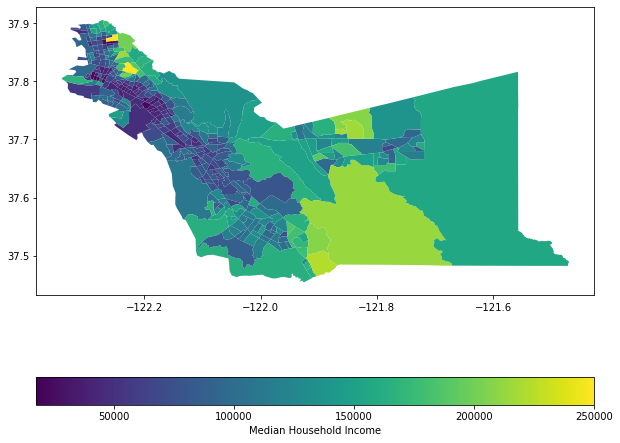

In [62]:
# Choropleth map
fig, ax = plt.subplots(figsize = (10,10)) 

tracts_acs_gdf.plot(column='med_hhinc', 
                    legend=True,
                    legend_kwds={'label': "Median Household Income",
                                 'orientation': "horizontal"},
                    ax=ax)
plt.show()

Take a minute to consider how each line in the above code cell impacts the output map.


<a id="section3"></a>
## 2.3 Color Maps (aka Color Palettes)

You can set the colors used in your choropleth map by specifiying a value for the `cmap` parameter - which stands for **color map**. A color map is a set of colors that can be associated with specific data values or a range of data values. The term `color palette` is also commonly used when refering to a color map.

The default matplotlib color map is used if one isn't specified. This color map is called `viridis` and is a `perceptually uniform colormap`, or one in which equal steps in data are perceived as equal steps in the color space. 

`Perceptually uniform colormaps`  are considered best for mapping data. Here are some ones you can try:

<div style="display:inline-block;vertical-align:middle;">
<img align="left" width=600 height=400 src="img/percept_cmap.png"></img>
</div>


For example, let's recreate the last map with the `inferno` color palette by setting `cmap="inferno"`.

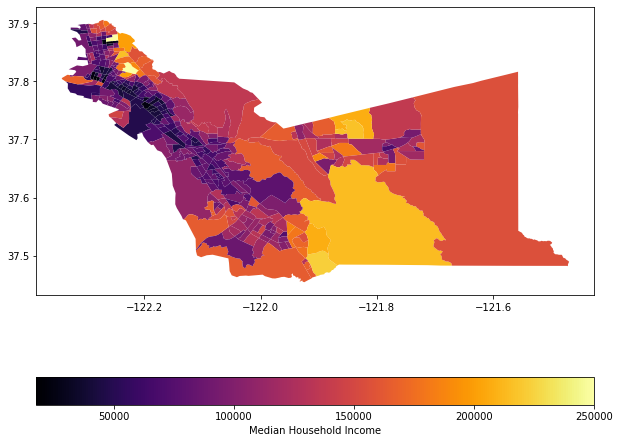

In [7]:
# Choropleth map
fig, ax = plt.subplots(figsize = (10,10)) 

tracts_acs_gdf.plot(column='med_hhinc',
                    cmap='inferno',
                    legend=True,
                    legend_kwds={'label': "Median Household Income",
                                 'orientation': "horizontal"},
                    ax=ax)
plt.show()

You can also try a simple single hue cmap like `Reds` or `Blues`.

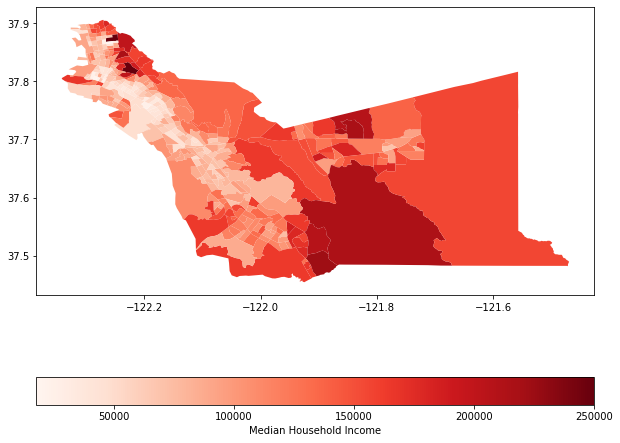

In [8]:
# Choropleth map
fig, ax = plt.subplots(figsize = (10,10)) 

tracts_acs_gdf.plot(column='med_hhinc',
                    cmap='Reds',
                    legend=True,
                    legend_kwds={'label': "Median Household Income",
                                 'orientation': "horizontal"},
                    ax=ax)
plt.show()

You can find a list of available `cmaps` on the [matplotlib website](https://matplotlib.org/tutorials/colors/colormaps.html).  That page also has a great discussion of color maps.

- Open that page in a new window to have it as a handy reference for the color map names.

### Types of Color Maps

There are a few different types of color maps (or color palettes), each of which has a different purpose:
- *diverging* - a "diverging" set of colors are used so emphasize mid-range values as well as extremes.
- *sequential* - usually with a single color hue to emphasize changes in magnitude, where darker colors typically mean higher values
- *qualitative* - a diverse set of colors to identify categories and avoid implying quantitative significance.

<img src="http://www.gnuplotting.org/figs/colorbrewer.png"></img>

> **Pro-tip**: You can actually see all your color map options if you misspell what you put in `cmap` and try to run-in. Try it out!

> **Pro-tip**: Sites like [ColorBrewer](https://colorbrewer2.org/#type=sequential&scheme=Blues&n=3) let's you play around with different types of color maps. If you want to create your own, [The Python Graph Gallery](https://python-graph-gallery.com/python-colors/) is a way to see what your Python color options are.


#### Exercise

In the cell below change the value of `cmap` to experiment with a different sequential, diverging, and qualitative color maps. View some color options from [The Python Graph Gallery](https://python-graph-gallery.com/python-colors/) in a seperate window 

- **Question**: Our geodataframe doesn't have any categorical variables. Can you think of how you might create one from the data?


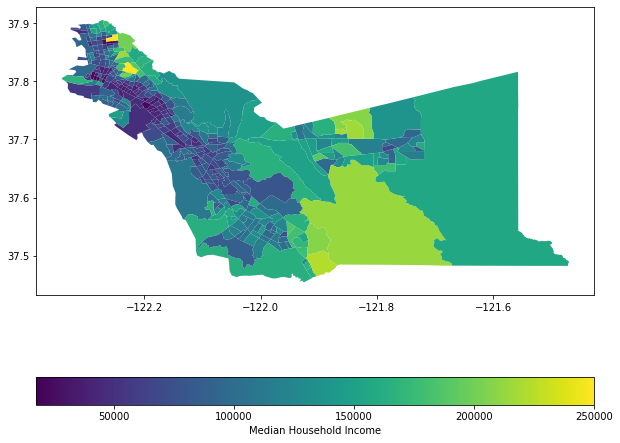

In [67]:
# Choropleth map
fig, ax = plt.subplots(figsize = (10,10)) 

tracts_acs_gdf.plot(column='med_hhinc',
                    # cmap = '???',
                    legend=True,
                    legend_kwds={'label': "Median Household Income",
                                 'orientation': "horizontal"},
                    ax=ax)
plt.show()


By default map colors are linearly scaled to data values. This is called a `proportional color map`.

- The great thing about `proportional color maps` is that you can visualize the full range of data values.

Let's consider this by revisiting the choropleth map of population density that we created in the last lesson.

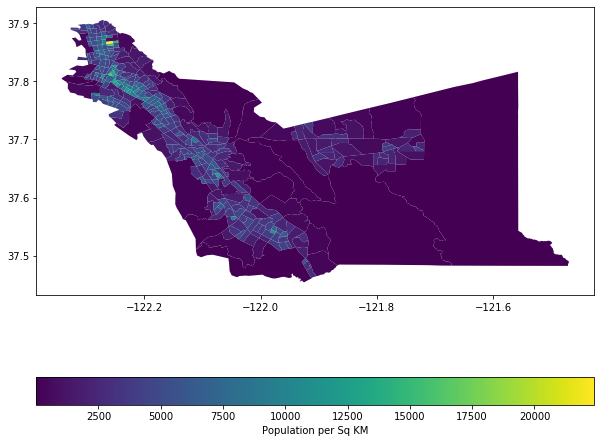

In [71]:
# Plot population density - km^2
fig, ax = plt.subplots(figsize = (10,10)) 
tracts_acs_gdf.plot(column='pop_dens_km2', 
                    legend=True,
                    legend_kwds={'label': "Population per Sq KM",
                                 'orientation': "horizontal"},
                    ax=ax)
plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

What's wrong with this map?

In [11]:
# Write your thoughts here

The population density map demonstrates a big downside of proportional color mapping: outliers can dominate the distribution of color values, masking important trends in the data.  

To better understand why this happens, a key first step in data mapping is to explore the range of values in your data.

A simple way to see summary statistics is the function `describe` which we used last time.

In [72]:
tracts_acs_gdf['pop_dens_km2'].describe()

count      360.000000
mean      4245.198437
std       3022.041337
min         14.126646
25%       2278.842040
50%       3703.408649
75%       5533.927771
max      22407.366162
Name: pop_dens_km2, dtype: float64

In [13]:
tracts_acs_gdf['pop_dens_km2'].describe

<bound method NDFrame.describe of 0      2687.562408
1      3861.098350
2      4370.611611
3      2401.649689
4      9111.115193
          ...     
355    2606.420284
356    5740.751936
357    2929.138204
358     940.551075
359    1477.872148
Name: pop_dens_km2, Length: 360, dtype: float64>

We can also create a histogram to see the overall distribution shape.

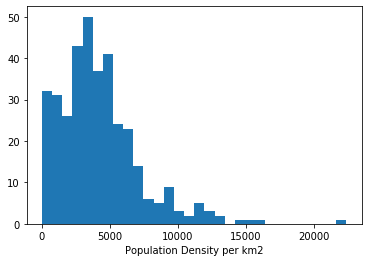

In [14]:
plt.hist(tracts_acs_gdf['pop_dens_km2'],bins=30)
plt.xlabel('Population Density per km2')
plt.show()

We see that the bulk of our tract population densities are around ~4000 persons/km^2. But the data has a long right tail - indicating outliers where some tracts have a very dense population. 

* **What impact does that have on the map?**

To minimize the impact of outliers on the map, we could set the bounds of our data to exclude the bottom 10% and top 10%.
- We can use the `describe` method to get these values.

In [79]:
tracts_acs_gdf['pop_dens_km2'].describe([.10,.9])# show's 10th and 90th 
                                                 # percentiles instead 
                                                 # of default 25th and 75th

count      360.000000
mean      4245.198437
std       3022.041337
min         14.126646
10%        888.617033
50%       3703.408649
90%       8129.953340
max      22407.366162
Name: pop_dens_km2, dtype: float64

And fetch one value from the describe output as follows...

In [74]:
tracts_acs_gdf['pop_dens_km2'].describe([.10,.9])['10%']

888.6170330880212

Now, we can use those values to set the `vmin` (visual minimum) and `vmax` (visual maximum) values in the plot.

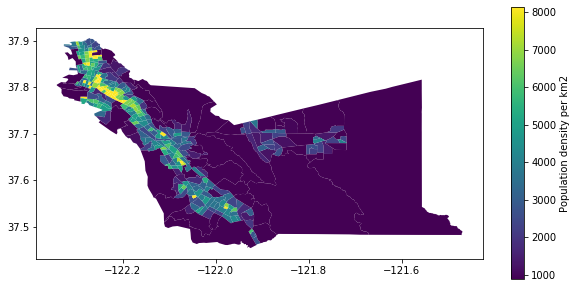

In [80]:
# Plot population density - km^2
fig, ax = plt.subplots(figsize = (10,5)) 
tracts_acs_gdf.plot(column='pop_dens_km2', 
                   legend=True, 
                   ax=ax,
                   vmin= tracts_acs_gdf['pop_dens_km2'].describe([.10,.9])['10%'], # color bunch all values at or below 10th percentile
                   vmax= tracts_acs_gdf['pop_dens_km2'].describe([.10,.9])['90%'], # color bunch all values at or above 90th percentile
                   legend_kwds={'label': "Population density per km2"})
plt.show()

By setting the `vmin` and `vmax` settings to the bottom and top 10 percentiles we dynamically recoded the data in those ranges to the 10 and 90 percentiles respectively, thus removing the impact of outliers. Pretty cool!

<a id="section6"></a>
## 2.6 Mapping Categorical Data

Mapping categorical data, also called qualitative data, is a bit more straightforward. There is no need to scale or classify data values. The goal of the color map is to provide a contrasting set of colors so as to clearly delineate different categories. Let's check out a polygon and a point example.

First, load the census tract data for all of California and then set the colors as a funciton of the County FIPS code (`COUNTYFP`).

In [98]:
#load the census tract data for all of california
cal_tracts = gpd.read_file("zip://../notebook_data/census/Tracts/cb_2018_06_tract_500k.zip")

In [43]:
cal_tracts.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."


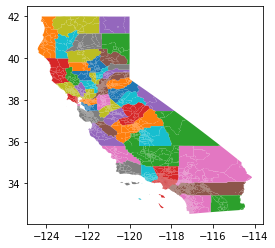

In [44]:
cal_tracts.plot(column='COUNTYFP', categorical=True)

This provides a quick way to see the CA county boundaries.

We can similarly create a categorical map of points with our alameda county census tract data.

First we need to create a qualitative variable, which in this example we call `majority_white`.

In [45]:
tracts_acs_gdf_point['majority_white'] = 'no' # default value
tracts_acs_gdf_point.loc[(tracts_acs_gdf_point['p_white']> 0.5), 'majority_white'] = 'yes'

And now plot it!

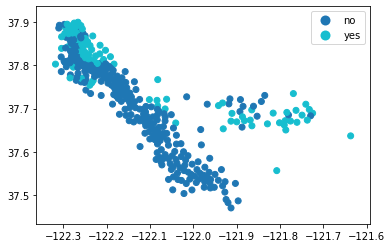

In [46]:
tracts_acs_gdf_point.plot(column='majority_white',  categorical=True, legend=True)

<a id="section7"></a>
## 2.7 Saving your Map


You can save your maps with the `plt.savefig` method.

> **Important**: you must `plt.savefig` your map before you display it with `plt.show()`! 

For example...

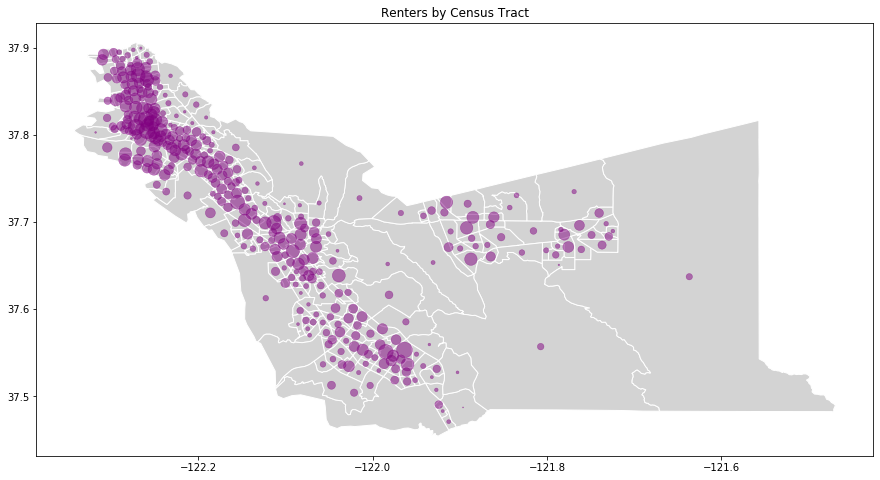

In [47]:
fig, ax = plt.subplots(figsize = (15,10)) 

tracts_acs_gdf.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize=(tracts_acs_gdf_point['c_renters']/10),
                          legend=True,
                          ax=ax)
ax.set_title("Renters by Census Tract")

# Save figure 
plt.savefig("../outdata/AC_renters.png")

# Then show plot
plt.show()

Take a look at your saved map file (double-click in this cell to see how this is done.)

![mymap](../outdata/AC_renters.png)

<a id="section8"></a>
## 2.8 Recap

In this notebook we learned about how to make and customize different types of data driven maps.

Below is a recap of the concepts and methods we covered:

- Different types of data maps
    - Choropleth
    - Proportional color
    - Proportional Symbol
    - Graduated color
    
- Color Maps (i.e. sequential, diverging, and categorical)
  - `cmap` 
  
- Classification schemes (I.e. equal interval, quantile…)
	- `scheme= ‘equalinterval’, ‘quantiles’` etc,

- User defined classification schemes
	- `classification_kwds` 
    
- Creating Point GeoDataframes
    - `.centroid`
- Categorical Maps
    - `gdf.plot(column=<column_name>, categorical=True)`
- Saving figure
	- `plt.savefig()` 
    


<a id="section9"></a>
---
## 2.9 Homework

#### Exercise 1

We're going to bring in our SF county level data once more. Please do the following:
1. Import SF joined ACS and tracts GeoJSON
2. Create a histogram of the distribution for `pct_nonwhite`
3. Create a choropleth of `pct_nonwhite` 
4. Customize bins
5. Customize with a different, diverging color scheme (pick a new value for cmap), add custom legend labels, and add a title to the map (bring it!)

In [48]:
# Your code here

*Click here for answers*

<!--- 
    # 1. Import SF joined ACS and tracts
    tracts_acs_gdf_sf = gpd.read_file("../notebook_data/outdata/tracts_acs_gdf_sf.json")
    # Create a percent non-white variable
    tracts_acs_gdf_sf['pct_nonwhite'] = 100 * ((tracts_acs_gdf_sf['c_race'] - tracts_acs_gdf_sf['c_white']) / tracts_acs_gdf_sf['c_race'])

    # 2. Create a historgram of the distribution for pct_nonwhite
    plt.hist(tracts_acs_gdf_sf['pct_nonwhite'],bins=30)
    plt.xlabel('Percent non-white')
    plt.show()


    # 3. Create a choropleth of pct_nonwhite
    fig, ax = plt.subplots(figsize = (15,6)) 

    # 4. Customize bins
    # Plot percent non-white as choropleth
    tracts_acs_gdf_sf.plot(column='pct_nonwhite', 
                            legend=True, 
                            cmap="PuOr", 
                            scheme='user_defined', 
                            classification_kwds={'bins':[20,40,60,80]},
                            edgecolor="grey",
                            linewidth=0.5,
                            ax=ax)

    legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']
    for j in range(0,len(ax.get_legend().get_texts())):
            ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

    plt.title("San Francisco, Percent Non-white")
    plt.tight_layout()
    plt.show()
--->

#### Exercise  2

Using the SF data, create a proportional symbol map for a variable of your choosing. The steps you need to take are:
1. Create a point dataframe for the SF data
2. Plot the point dataframe to make sure its correct
3. Choose a variable and create a proportional symbol map
4. Customize!

In [49]:
# Your code here

*Click here for answers*

<!--- 
    # 1. Create a point dataframe for the SF data
    tracts_acs_gdf_sf_point = gpd.GeoDataFrame(tracts_acs_gdf_sf.loc[:,tracts_acs_gdf_sf.columns!='geometry'], 
                                geometry=tracts_acs_gdf_sf.centroid)

    # 2.  Plot the point dataframe to make sure its correct
    tracts_acs_gdf_sf_point.plot()
    plt.show()

    # 3. Choose a variable and create a proportional symbol map
    # 4. Customize

    fig, ax = plt.subplots(figsize = (10,10)) 

    tracts_acs_gdf_sf.plot(color='lightgrey',
                        edgecolor='white',
                        ax=ax)

    tracts_acs_gdf_sf_point.plot(color='teal', 
                              alpha=0.5, 
                              linewidths=0.5, 
                              markersize=(tracts_acs_gdf_sf_point['c_owners']^2)/3, 
                              ax=ax)
    plt.show()
--->

#### Exercise 3
Recreate the `majority_white` categorical map, shown above, but set the `cmap` to one of the [matplotlib qualitative colormaps](https://matplotlib.org/tutorials/colors/colormaps.html).

In [50]:
# Your code here

*Click here for answers*

<!---
tracts_acs_gdf_point.plot(column='majority_white', categorical=True, legend=True, cmap='Set1')
-->

#### Extra Challenge

Pick 3 variables to map in separate plots-- but do it in a loop. Refer to the `Optional Mapping Notebook` for more information.

In [51]:
# Your code here

*Click here for answers*

<!--- 
    acs_vars =['p_black', 'p_asian', 'p_latinx']

    for var in acs_vars:
        fig, ax = plt.subplots(figsize = (10,5)) 
        tracts_acs_gdf.plot(column=var,
                            scheme="quantiles",
                            cmap='magma',
                            legend=True,
                            ax=ax
                           )
        ax.set_title(var)
        plt.show()
--->

<a id="section9"></a>
## References

Please review these resources before or after this lesson.

- [ESRI Introduction to Map Design (This is a cheat sheet of all the important concepts & practices)](https://www.esri.com/industries/k-12/education/~/media/Files/Pdfs/industries/k-12/pdfs/intrcart.pdf)
- [AxisMaps Cartography Guide](https://www.axismaps.com/guide)
- [Geographic Data Science with Python, Chapter 5: Choropleth Maps](https://geographicdata.science/book/notebooks/05_choropleth.html)